## A4_2 : Cluster Analysis
                    Gauri Vinod Nair
                    V01110160

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
df = pd.read_csv('Survey.csv')

# Inspect the data
print(df.head())
print(df.info())

        City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                   Residing   
1                         Yes  6M to 1Yr                 Investment   
2                         Yes  <6 Months              Rental Income   
3                         Yes  <6 Months                 Investment   
4                         Yes     1-2 Yr                   Residing   

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0          Apartment  ...          

In [4]:
# Handle concatenated strings (if applicable)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.split(r'(?<!\w)(?=[A-Z])').str[0]  # Simplified splitting

# Verify the data after cleaning
print(df.head())
print(df.info())

  City Sex    Age Occupation Monthly Household Income  Income  \
0           26-35                    85,001 to105,000   95000   
1           46-60                    45,001 to 65,000   55000   
2           46-60                    25,001 to 45,000   35000   
3           36-45                             >125000  200000   
4           26-35                    85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                              6M to 1Yr                              
1                              6M to 1Yr                              
2                                    <6                               
3                                    <6                               
4                                   1-2                               

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0                     ...                                1    9  1200    72.5   
1                   

In [5]:
# Select only categorical columns and numerical columns for clustering
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_categorical = df[categorical_cols]
df_numerical = df[numerical_cols]

In [6]:
# Handle missing values in numerical data
df_numerical.fillna(df_numerical.mean(), inplace=True)

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
df_encoded_cat = encoder.fit_transform(df_categorical)# Handle missing values in numerical data
df_numerical.fillna(df_numerical.mean(), inplace=True)

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid multicollinearity
df_encoded_cat = encoder.fit_transform(df_categorical)

C:\Users\gauri\AppData\Local\Temp\ipykernel_22524\3144909215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.fillna(df_numerical.mean(), inplace=True)
C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\gauri\AppData\Local\Temp\ipykernel_22524\3144909215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.fillna(df_numerical.mean(), inplace=True)
C:\Users\gauri\an

In [7]:
# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

In [8]:
# Create DataFrame from encoded categorical data
df_encoded_cat = pd.DataFrame(df_encoded_cat, columns=encoded_feature_names)

# Combine encoded categorical data with numerical data
df_encoded = pd.concat([df_encoded_cat, df_numerical.reset_index(drop=True)], axis=1)

In [9]:
# Feature scaling
scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded)

C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

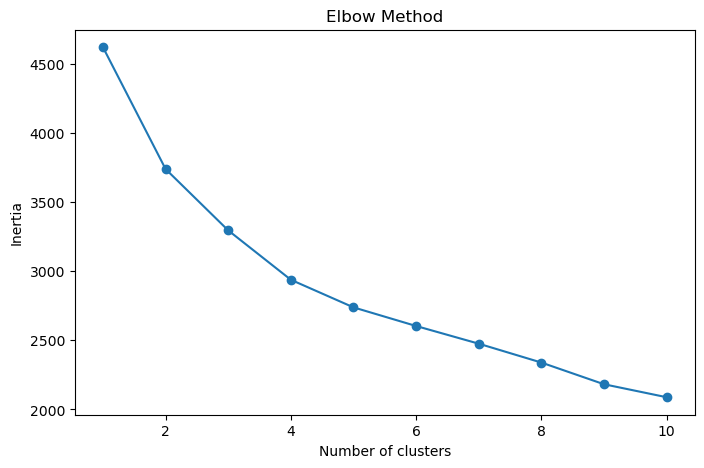

In [10]:
# Determine optimal number of clusters using the Elbow method or Silhouette score
# Example using Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
# Perform KMeans clustering
k = 3  # Choose the optimal number of clusters based on the Elbow method or Silhouette score
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_encoded_scaled)

C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Convert non-numeric columns to numeric (if necessary)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Handle any remaining missing values
df.fillna(0, inplace=True)

In [14]:
# Analyze cluster characteristics (e.g., centroids, cluster sizes)
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         City  Sex  Age  Occupation  Monthly Household Income         Income  \
Cluster                                                                        
0         0.0  0.0  0.0         0.0                       0.0   35000.000000   
1         0.0  0.0  0.0         0.0                       0.0   70384.615385   
2         0.0  0.0  0.0         0.0                       0.0  175909.090909   

         Planning to Buy a new house  Time Frame  Reasons for buying a house  \
Cluster                                                                        
0                                0.0         0.0                         0.0   
1                                0.0         0.0                         0.0   
2                                0.0         0.0                         0.0   

         what type of House  ...  4. Availability of domestic help      Time  \
Cluster                      ...                                               
0                       0.0  ...      

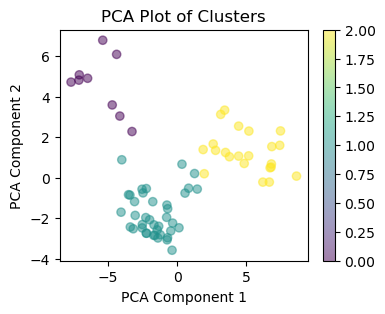

In [15]:
# Optional: Visualize clusters (PCA for dimensionality reduction if needed)
# Example using PCA for visualization (if you have many features)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_encoded_pca = pca.fit_transform(df_encoded_scaled)

plt.figure(figsize=(4, 3))
plt.scatter(df_encoded_pca[:, 0], df_encoded_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('PCA Plot of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [15]:
# Assess cluster quality with silhouette score
silhouette_avg = silhouette_score(df_encoded_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.17980065176002039
